## 1. This is a Jupyter notebook!
<p>A <em>Jupyter notebook</em> is a document that contains text cells (what you're reading right now) and code cells. What is special with a notebook is that it's <em>interactive</em>: You can change or add code cells, and then <em>run</em> a cell by first selecting it and then clicking the <em>run cell</em> button above ( <strong>▶|</strong> Run ) or hitting <code>ctrl + enter</code>. </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_33/datasets/run_code_cell_image.png" alt=""></p>
<p>The result will be displayed directly in the notebook. You <em>could</em> use a notebook as a simple calculator. For example, it's estimated that on average 256 children were born every minute in 2016. The code cell below calculates how many children were born on average on a day. </p>

In [16]:
# I'm a code cell, click me, then run me!
256 * 60 * 24 # Children × minutes × hours

[1] 368640

## 2. Put _any_ code in code cells
<p>But a code cell can contain much more than a simple one-liner! This is a notebook running R and you can put <em>any</em> R code in a code cell (but notebooks can run other languages too, like python). Below is a code cell where we define a whole new function (<code>greet</code>). To show the output of <code>greet</code> we can run it anywhere and the result is always printed out at the end of the code cell. </p>

In [18]:
greet <- function(first_name, last_name) {
  paste("My name is ", last_name, ", ", 
        first_name, " ", last_name, "!", sep = "")
}

# Replace with your first and last name.
# That is, unless your name is already James Bond.
greet("James", "Bond")

[1] "My name is Bond, James Bond!"

## 3. Jupyter notebooks ♡ data
<p>We've seen that notebooks can display basic objects such as numbers and strings. But notebooks also support the objects used in data science, which makes them great for interactive data analysis!</p>
<p>For example, below we create a data frame by reading in a <code>csv</code>-file with the average global temperature for the years 1850 to 2016. If we look at the <code>head</code> of this data frame the notebook will render it as a nice-looking table.</p>

In [20]:
# Reading in the global temperature data,data
global_temp <- read.csv("datasets/global_temperature.csv")

# Take a look at the first datapoints
# .... YOUR CODE FOR TASK 3 ....
head(global_temp)

year,degrees_celsius
1850,7.74
1851,8.09
1852,7.97
1853,7.93
1854,8.19
1855,8.12


## 4. Jupyter notebooks ♡ plots
<p>Tables are nice but — as the saying goes — <em>"a plot can show a thousand data points"</em>. Notebooks handle plots as well and all plots created in code cells will automatically be displayed inline. </p>
<p>Let's take a look at the global temperature for the last 150 years.</p>

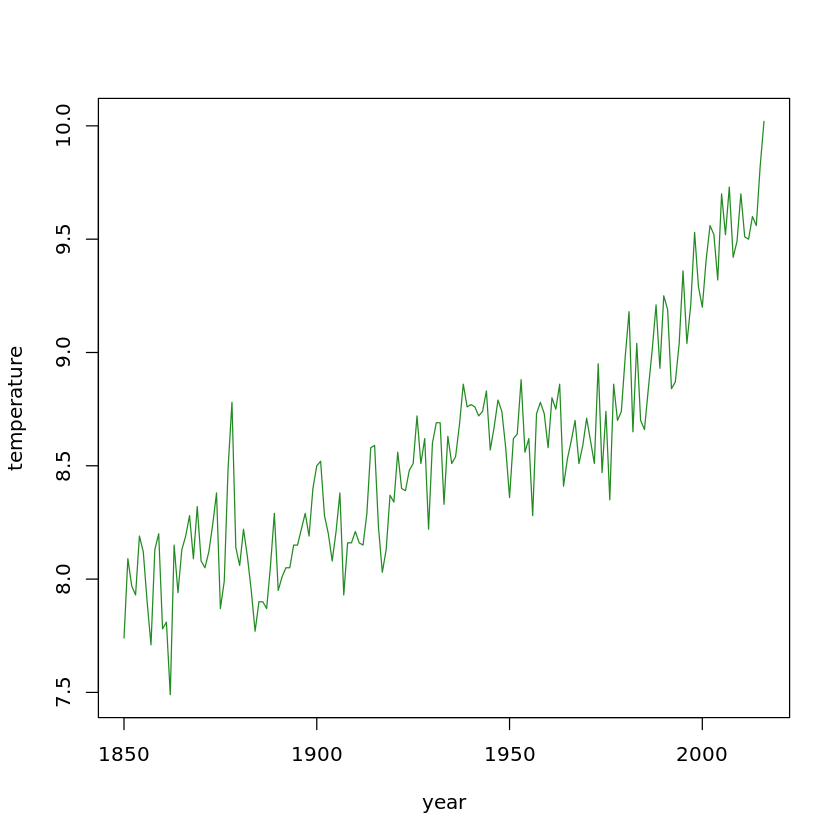

In [22]:
# Plotting global temperature in degrees celsius by year.
plot(global_temp$year, global_temp$degrees_celsius, 
     type = "l", col = "forestgreen", 
     xlab = "year", ylab = "temperature")

## 5. Jupyter notebooks ♡ Data Science
<p>Tables and plots are the most common outputs when doing data science and, as these outputs are rendered inline, notebooks works great not only for <em>doing</em> a data analysis but also for <em>showing</em> a data analysis. A finished notebook contains both the result and the code that produced it. This is useful when you want to share your findings or if you need to update your analysis with new data.</p>
<p>Let's add some advanced data analysis to our notebook! For example, this (slightly complicated) code forecasts the global temperature 50 years into the future using an <em>exponential smoothing state space model</em> (<code>ets</code>).</p>
<p><em><strong>Note</strong>: Global temperature is a complex phenomenon and exponential smoothing is likely not a good model here. This is just an example of how easy it is to do (and show) complex forecasting in a Jupyter notebook.</em></p>

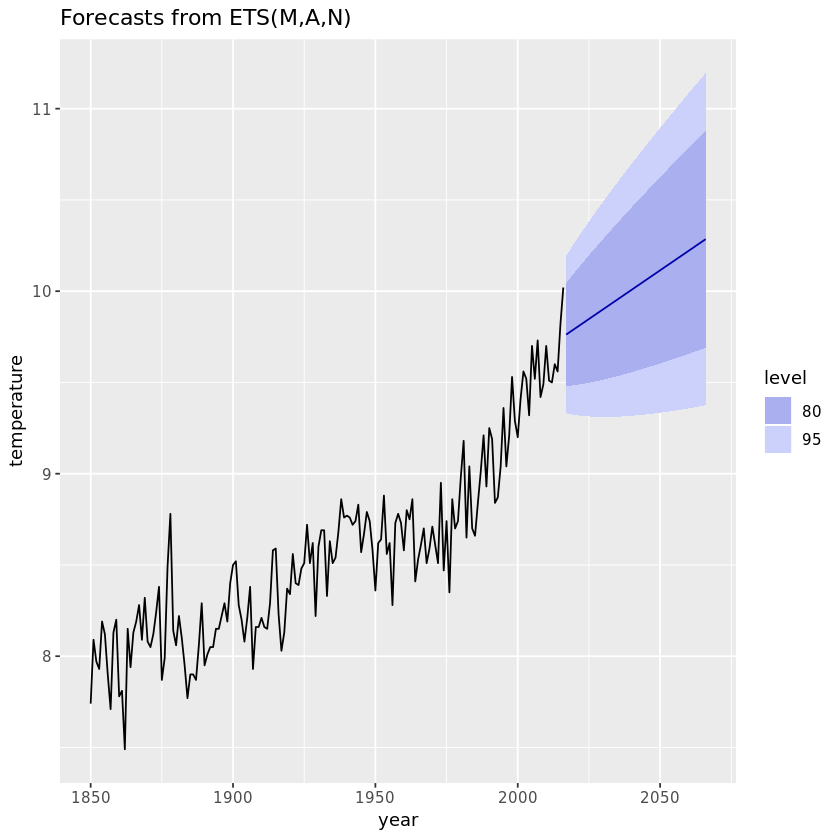

In [24]:
library(forecast)
library(ggplot2)

# Converting global_temp into a time series (ts) object.
global_temp_ts <- ts(global_temp$degrees_celsius, 
                     start = global_temp$year[1])

# Forecasting global temperature 50 years into the future 
# using an exponential smoothing state space model (ets).
temperature_forecast <- forecast( ets(global_temp_ts), h = 50)

# Plotting the forecast
# .... YOUR CODE FOR TASK 5 ....
autoplot(temperature_forecast, xlab='year', ylab='temperature')

## 6. Goodbye for now!
<p>This was just a short introduction to Jupyter notebooks, an open source technology that is increasingly used for data science and analysis. I hope you enjoyed it! :)</p>

In [26]:
# Are you ready to get started with  DataCamp projects?
I_am_ready <- TRUE

# Ps. 
# Feel free to try out any other stuff in this notebook. 
# It's all yours!
I_am_ready

[1] TRUE